# Mary shuttlebox tracking

In [1]:
%matplotlib inline

# load libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("OpenCV version: {}".format(cv2.__version__))

OpenCV version: 3.2.0


In [2]:
# load in the video

cap = cv2.VideoCapture("shuttle_box_newsettings_male.wmv")

# print some stats about the video

width, height = cap.get(3), cap.get(4)
number_frames = cap.get(7)
fps = cap.get(5)

print("""
size of video: {w} x {h}
total number of frames: {num}
fps: {fps}
""".format(w = width, h = height, num = number_frames, fps = fps))


size of video: 960.0 x 544.0
total number of frames: 4535595.0
fps: 1000.0



(544, 960, 3)


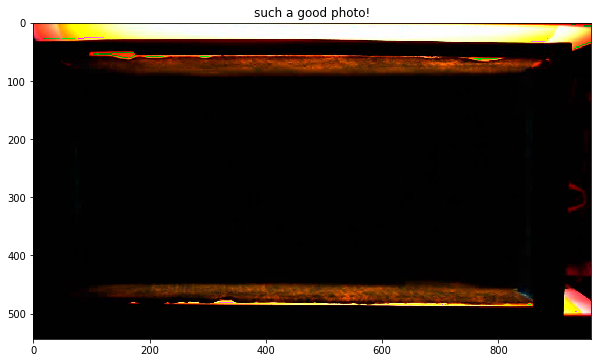

In [3]:
# show the first image
_, frame = cap.read()

print(frame.shape)

plt.figure(figsize = (10,10))
plt.imshow(frame)
plt.title("such a good photo!")
plt.show()

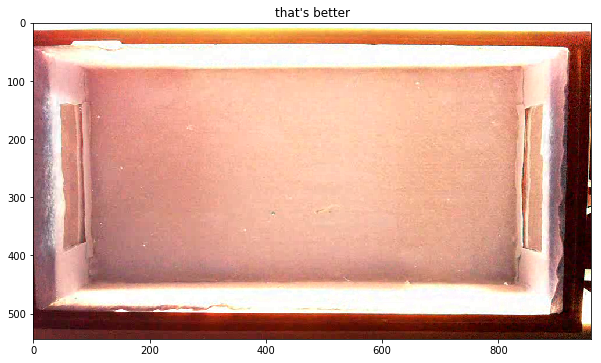

In [4]:
# Mary told me to skip ahead many frames:

cap.set(1, 2000)
ret, frame = cap.read()

# plot it
plt.figure(figsize = (10,10))
plt.imshow(frame)
plt.title("that's better")
plt.show()

Let's try calculating the background then using background subtraction to find where the fish is.

2000
3000
4000
5000
6000
7000
8000
9000


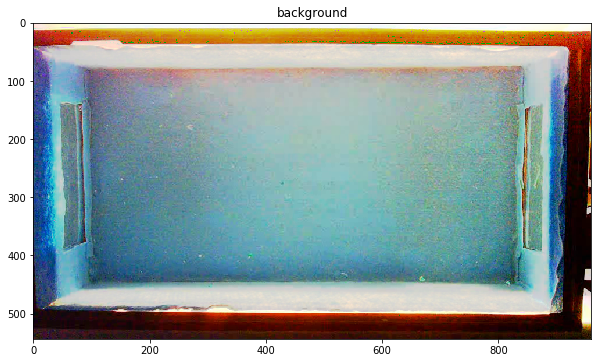

In [18]:
def addToBackgroundImage(frame, old_background_image):
    """add frame to the background image called old_background_image, return updated image."""
    old_background_image = np.float32(old_background_image)
    cv2.accumulateWeighted(frame, old_background_image, 0.8)
    final = cv2.convertScaleAbs(old_background_image)
    return final

# start at the 2000th frame
cap.set(1, 2000)

background = frame

for i in range(2000, 10000, 1000):
    print(i)
    cap.set(1, i)
    ret, current_image = cap.read()
    background = addToBackgroundImage(current_image, background)

plt.figure(figsize = (10,10))
plt.imshow(background)
plt.title("background")
plt.show()

Now let's see if we can find the fish by subtracting a random frame from this background image.

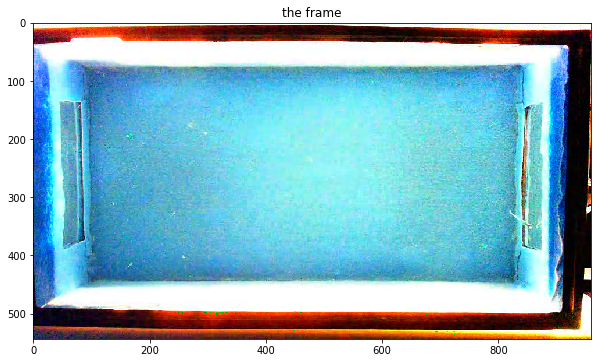

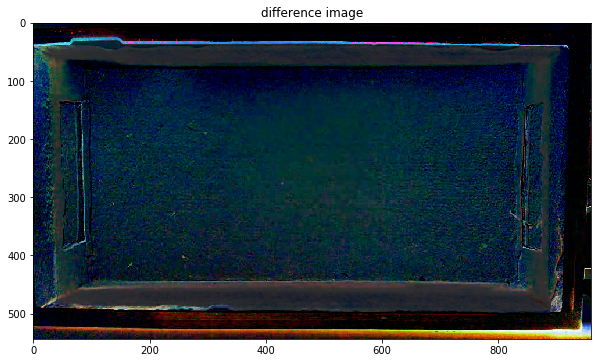

In [25]:
cap.set(1, 5100)
_, frame = cap.read()

diff = cv2.subtract(frame, background)

plt.figure(figsize = (10,10))
plt.imshow(frame)
plt.title("the frame")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(diff)
plt.title("difference image")
plt.show()

Huh.